#  Import Necessary libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor

# Import Data

In [2]:
fraud_Data=pd.read_csv("Fraud_check.csv")

In [3]:
fraud_Data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Data Understanding

In [4]:
fraud_Data.shape

(600, 6)

In [5]:
fraud_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fraud_Data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud_Data.duplicated().sum()

0

In [8]:
fraud_Data.describe(include="all")

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [9]:
fraud_Data_1=fraud_Data.copy()

##  Correlation matrix and Heatmap

In [10]:
fraud_Data_1.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [11]:
import seaborn as sns

<AxesSubplot:>

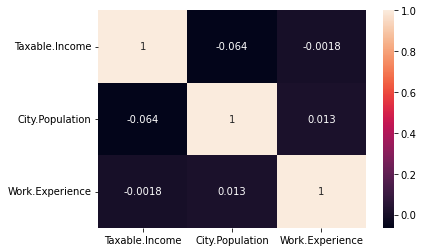

In [12]:
sns.heatmap(fraud_Data_1.corr(),annot=True)

##  Data Preprocessing

In [13]:
fraud_Data_1=fraud_Data.copy()

###  Setting up the criteria using :Apply function

In [14]:
fraud_Data_1['Eligibility_Criteria'] =fraud_Data_1['Taxable.Income'].apply(lambda x: "Risky" if x<= 30000 else "Good")

In [15]:
fraud_Data_1.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Eligibility_Criteria
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [16]:
fraud_Data_1.shape

(600, 7)

In [17]:
fraud_Data_1.dtypes

Undergrad               object
Marital.Status          object
Taxable.Income           int64
City.Population          int64
Work.Experience          int64
Urban                   object
Eligibility_Criteria    object
dtype: object

#### Features conversion:

In [18]:
fraud_Data_1['Eligibility_Criteria']=fraud_Data_1['Eligibility_Criteria'].astype('category')
fraud_Data_1['Urban']=fraud_Data_1['Urban'].astype('category')
fraud_Data_1['Marital.Status']=fraud_Data_1['Marital.Status'].astype('category')
fraud_Data_1['Undergrad']=fraud_Data_1['Undergrad'].astype('category')

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le_encoder = LabelEncoder()
fraud_Data_1['Eligibility_Criteria'] = le_encoder.fit_transform(fraud_Data_1['Eligibility_Criteria'])
fraud_Data_1['Urban'] = le_encoder.fit_transform(fraud_Data_1['Urban'])
fraud_Data_1['Marital.Status'] = le_encoder.fit_transform(fraud_Data_1['Marital.Status'])
fraud_Data_1['Undergrad'] = le_encoder.fit_transform(fraud_Data_1['Undergrad'])

In [21]:
fraud_Data_1.dtypes

Undergrad               int32
Marital.Status          int32
Taxable.Income          int64
City.Population         int64
Work.Experience         int64
Urban                   int32
Eligibility_Criteria    int32
dtype: object

In [22]:
fraud_Data_1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Eligibility_Criteria
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [23]:
X =fraud_Data_1.drop(['Eligibility_Criteria','Taxable.Income'],axis=1)
y =fraud_Data_1[['Eligibility_Criteria']]

In [24]:
X.shape,y.shape

((600, 5), (600, 1))

### Validation :Train_test_split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=None)

In [26]:
X_train.shape,y_train.shape

((480, 5), (480, 1))

In [27]:
X_test.shape,y_test.shape

((120, 5), (120, 1))

## Model Building || Training

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth = 3,criterion='gini')

In [29]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Plot the Tree

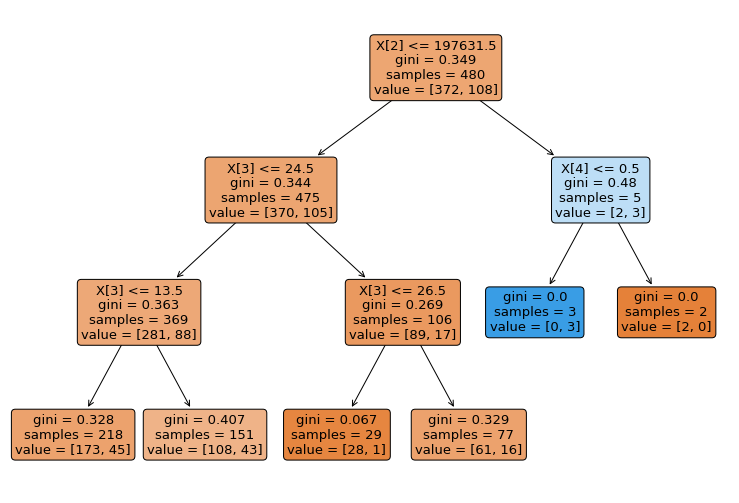

In [30]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(13,9))
plot_tree(decision_tree = dt_model,filled=True,rounded=True)
plt.show()

## Model Evaluation:

### Training Data

In [31]:
y_pred_train = dt_model.predict(X_train)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
print('Accuracy Score : ',accuracy_score(y_train,y_pred_train))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy Score :  0.78125
-------------------------------------------
Confusion Matrix:
 [[372   0]
 [105   3]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       372
           1       1.00      0.03      0.05       108

    accuracy                           0.78       480
   macro avg       0.89      0.51      0.47       480
weighted avg       0.83      0.78      0.69       480



### Area Under the Curve[AUC]

In [34]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, dt_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print('Area Under the Curve[AUC]: ',auc)

Area Under the Curve[AUC]:  0.5138888888888888


####  Roc Curve

Text(0, 0.5, 'True Positive Rate')

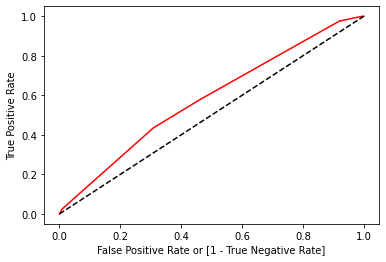

In [35]:
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

##  Model Testing 

In [36]:
y_pred_test = dt_model.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred_test)

0.8333333333333334

#### Evaluation

In [38]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred_test))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Accuracy Score :  0.8333333333333334
-------------------------------------------
Confusion Matrix:
 [[100   4]
 [ 16   0]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       104
           1       0.00      0.00      0.00        16

    accuracy                           0.83       120
   macro avg       0.43      0.48      0.45       120
weighted avg       0.75      0.83      0.79       120



### Getting Optimal values for Hyperparameters

### 1.GridSearchCV:

In [39]:
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(estimator = dt_model,param_grid = {'criterion':['entropy','gini'],
                                                                'max_depth':[5,6,7,8,9,10],'max_leaf_nodes':[1,2,3,4]},
                              cv=5)
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 2}
0.7933333333333332


### 2.Accuracy Plot:

In [40]:
train_accuracy=[]
test_accuracy=[]
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth = depth)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    test_accuracy.append(dt_model.score(X_test,y_test))

In [41]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.777083,0.833333
1,2,0.781250,0.850000
2,3,0.781250,0.850000
3,4,0.783333,0.833333
4,5,0.789583,0.841667


Text(0, 0.5, 'performance')

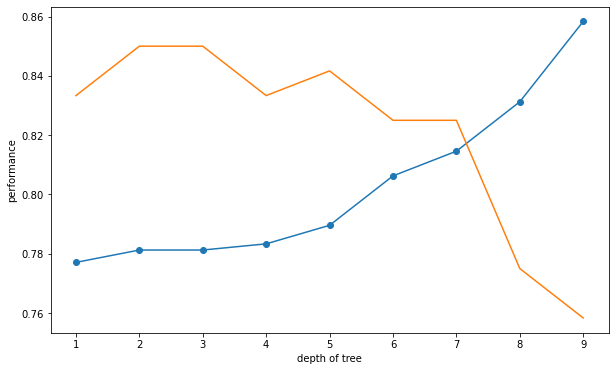

In [56]:
plt.figure(figsize=(10,6))
plt.plot(frame["max_depth"],frame["train_acc"],marker='o')
plt.plot(frame["max_depth"],frame["test_acc"])
plt.xlabel("depth of tree")
plt.ylabel("performance")

####  Gives  max_depth = 7

### Building the model with the outcome of this Hyper-Parameter analysis(Hyper parameter Tweaking)

###    So we build the model  with      max_depth = 7,criterion='entropy'

###  Model Building || Training

In [59]:
dt_model_1 = DecisionTreeClassifier(max_depth = 7,criterion='entropy')

In [60]:
dt_model_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

###  plot the tree

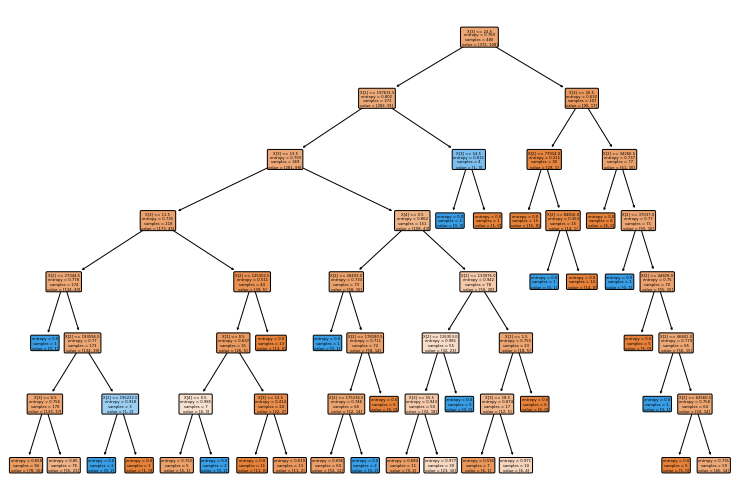

In [61]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(13,9))
plot_tree(decision_tree = dt_model_1,filled=True,rounded=True)
plt.show()

###  Model Prediction

In [63]:
y_pred_train_1 = dt_model_1.predict(X_train)

###  Evaluation:

#### Training data:

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy Score : ',accuracy_score(y_train,y_pred_train_1))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train_1))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_train,y_pred_train_1))

Accuracy Score :  0.8145833333333333
-------------------------------------------
Confusion Matrix:
 [[372   0]
 [ 89  19]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       372
           1       1.00      0.18      0.30       108

    accuracy                           0.81       480
   macro avg       0.90      0.59      0.60       480
weighted avg       0.85      0.81      0.76       480



###  Area Under the Curve[AUC]

In [65]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, dt_model_1.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train_1)
print('Area Under the Curve[AUC]: ',auc)

Area Under the Curve[AUC]:  0.587962962962963


Text(0, 0.5, 'True Positive Rate')

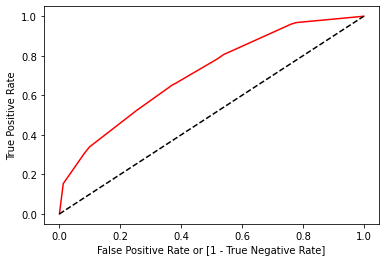

In [66]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

###  Test data

In [67]:
y_pred_test_1 = dt_model_1.predict(X_test)

#### Accuracy Score

In [68]:
accuracy_score(y_test,y_pred_test_1)

0.8166666666666667

In [69]:
dt_model_1.n_classes_

2

In [71]:
y_pred_test_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

### Observation:

####  We get Accuracy score for Training data and Testing data almost same so this can be taken as Generalized model

### =========================================================================